In [7]:
import numpy as np
import pandas as pd
import scipy.io
train_mat = scipy.io.loadmat('train_data.mat') 
test_mat = scipy.io.loadmat('test_data.mat') 

In [8]:
def get_data_from_mat(train_file,test_file):
    train_mat = scipy.io.loadmat(train_file) 
    test_mat = scipy.io.loadmat(test_file) 
    print(train_mat.keys())
    print(test_mat.keys())
    train_np = np.array(train_mat['train_data']).transpose(2,0,1)
    #print(train_np.size)
    test_np = np.array(test_mat['test_data']).transpose(2,0,1)
    print('Train shape: ',train_np.shape)
    print('Test shape: ',test_np.shape)
    return  train_np, test_np


train_data, test_data = get_data_from_mat('train_data.mat','test_data.mat')

dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
Train shape:  (112, 90, 90)
Test shape:  (28, 90, 90)


In [9]:
print(train_data[0])

[[0.         0.         0.13152513 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.13152513 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.28060623]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.28060623 0.         0.        ]]


In [4]:
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact

def visualize(image):  
    plt.figure("sample", (12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap="gray")    
    plt.subplot(1, 2, 2)
    plt.imshow(image, cmap="gray")
    plt.show()      


#@interact
def show_ds(ds):
    print("ds shape:",ds.shape)
    print("ds max:",np.max(ds))
    print("ds min:",np.min(ds))
    print("ds average:",np.average(ds))
    print("ds length:", len(ds))
    @interact
    def visualize_set(scan_index=(0,len(ds)-1)):
        print(scan_index)
        visualize(ds[scan_index,:,:])

show_ds(train_data)

ds shape: (112, 90, 90)
ds max: 1.0
ds min: 0.0
ds average: 0.024116160549305543
ds length: 112


interactive(children=(IntSlider(value=55, description='scan_index', max=111), Output()), _dom_classes=('widget…

In [5]:
show_ds(test_data)

ds shape: (28, 90, 90)
ds max: 1.0
ds min: 0.0
ds average: 0.024994026906171023
ds length: 28


interactive(children=(IntSlider(value=13, description='scan_index', max=27), Output()), _dom_classes=('widget-…

# 1. Pré-preparação dos datasets

In [10]:
from torch.utils.data import Dataset
import numpy as np

TRAIN_CSV_PATH = 'train.csv'
TEST_CSV_PATH = 'test.csv'

In [11]:
#Transformar os dados de modo a que cada uma das matrizes fiquem em vetor
train_data, test_data = get_data_from_mat('train_data.mat','test_data.mat')

#arr = []
#for line in train_data:
#    arr.append((np.array(line)).flatten())
#train_data_flat = np.array(arr)
#print('Shape dos dados de treino depois da transformação: ', train_data_flat.shape)

#arr = []
#for line in test_data:
#    arr.append((np.array(line)).flatten())
#test_data_flat = np.array(arr)
#print('Shape dos dados de teste depois da transformação: ', test_data_flat.shape)

dict_keys(['__header__', '__version__', '__globals__', 'train_data'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])
Train shape:  (112, 90, 90)
Test shape:  (28, 90, 90)


### 1.1. Juntar a informação do dataset train.csv com a informação dos scans

In [12]:
df_train = pd.read_csv(TRAIN_CSV_PATH)
df_test = pd.read_csv(TEST_CSV_PATH)

train_data_2 = df_train.values[:,1:] #Retirar o id
test_data_2 = df_test.values[:,1:] #Retirar o id
print('Dados de treino com informação sobre a idade, o sexo e a educação: ',train_data_2)
print('Dados de teste com informação sobre o sexo e a educação: ',test_data_2)

#Juntar as novas informações aos dados de treino
arr = []
for i in range(len(train_data_flat)):
    arr.append(np.concatenate((train_data_flat[i],train_data_2[i]),axis=0))
    
final_train_data = np.array(arr)
print('Shape dos dados de treino finais: ',final_train_data.shape)
    
#Juntar as novas informações aos dados de teste
arr = []
for i in range(len(test_data_flat)):
    arr.append(np.concatenate((test_data_flat[i],test_data_2[i]),axis=0))

final_test_data = np.array(arr)
print('Shape dos dados de teste finais: ',final_test_data.shape)

Dados de treino com informação sobre a idade, o sexo e a educação:  [[13  1  7]
 [14  0  8]
 [15  1  9]
 [15  1  9]
 [15  1  9]
 [15  1  9]
 [16  0 10]
 [16  1 10]
 [16  0 10]
 [17  0 11]
 [15  1  9]
 [16  0 10]
 [16  0 10]
 [15  1  9]
 [16  1 10]
 [15  1  9]
 [17  1 11]
 [16  1 10]
 [16  0 10]
 [24  1  9]
 [37  1  9]
 [21  0 12]
 [24  1 17]
 [18  1 12]
 [26  1 12]
 [18  0 13]
 [40  0  9]
 [25  1 16]
 [54  1  6]
 [33  0 12]
 [46  0  9]
 [25  1 15]
 [19  0 12]
 [18  1  9]
 [31  0 17]
 [18  1 14]
 [24  1 15]
 [28  1 17]
 [24  1 17]
 [27  0 15]
 [27  0 17]
 [19  1 13]
 [19  1 13]
 [40  0 20]
 [41  1  6]
 [27  0 16]
 [24  1 17]
 [20  0 14]
 [42  0  6]
 [22  0  9]
 [20  0 14]
 [25  0 19]
 [22  0 16]
 [25  1 19]
 [18  0 14]
 [61  0  4]
 [53  0  4]
 [65  1  2]
 [53  0  9]
 [77  0  4]
 [64  1  0]
 [56  0  9]
 [55  0 16]
 [62  0  4]
 [68  1  4]
 [62  1  4]
 [57  0  4]
 [68  0  4]
 [58  0  4]
 [70  1  4]
 [69  1  2]
 [71  1  3]
 [72  0 12]
 [56  1  7]
 [59  0  7]
 [73  0 12]
 [68  1  4]
 [58  1 

NameError: name 'train_data_flat' is not defined

### 1.2. Dividir os dados de treino em subsets de treino e de teste

In [116]:
#Calcular a porção de dados de treino e de teste
n_test = 0.25
size_test = round(n_test * len(final_train_data))
print('Quantidade de dados para treino: ', len(final_train_data) - size_test)
print('Quantidade de dados para teste: ', size_test)

#Dar shuffle ao array
np.random.shuffle(final_train_data)
test = final_train_data[:size_test,]
train = final_train_data[size_test:,]
print('Shape dos dados de treino: ', train.shape)
print('Shape dos dados de teste: ', test.shape)

Quantidade de dados para treino:  84
Quantidade de dados para teste:  28
Shape dos dados de treino:  (84, 8103)
Shape dos dados de teste:  (28, 8103)


# 2. Começar a preparar tudo para os modelos

In [216]:
import torch
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Softmax
from torch.nn import Module
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
    
from torch.utils.data import DataLoader
from torchvision.transforms import Compose
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [202]:
def normalize(X):
    Xmax = np.max(X, axis = 0)
    Xmin = np.min(X, axis = 0)
    return (X-Xmin)/(Xmax-Xmin)

class ProjectDataset(Dataset):
    def __init__(self, train, test):
        ### NORMALIZAR A COLUNA DA EDUCAÇÃO ###
        train[:,8102] = normalize(train[:,8102])
        test[:,8102] = normalize(test[:,8102])
        
        self.x_train = np.delete(train,8100,1) #Ficar com tudo menos a idade
        self.y_train = train[:,8100] #Ficar só com a idade
        self.x_test = np.delete(test,8100,1) #Ficar com tudo menos a idade
        self.y_test = test[:,8100] #Ficar só com a idade
        
        self.x_train = self.x_train.astype('float32')
        self.x_test = self.x_test.astype('float32')
        self.y_train = LabelEncoder().fit_transform(self.y_train)
        self.y_test = LabelEncoder().fit_transform(self.y_test)
        self.y_train = self.y_train.astype('long')
        self.y_test = self.y_test.astype('long')
        
    def __len_train__(self):
        return len(self.x_train)

    def __len_test__(self):
        return len(self.x_test)
    
    def __getitem_train__(self, idx):
        return [self.x_train[idx], self.y_train[idx]]
    
    def get_splits_flat(self):
        x_train = torch.from_numpy(np.array(self.x_train))
        y_train = torch.from_numpy(np.array(self.y_train))
        x_test = torch.from_numpy(np.array(self.x_test))
        y_test = torch.from_numpy(np.array(self.y_test))
        train = torch.utils.data.TensorDataset(x_train,y_train)
        test = torch.utils.data.TensorDataset(x_test,y_test)
        return train, test 

In [203]:
BATCH_SIZE = 32

In [204]:
def prepare_data_flat(train,test):
    dataset = ProjectDataset(train, test)
    train, test = dataset.get_splits_flat()

    train_dl = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
    test_dl = DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)
    train_dl_all = DataLoader(train, batch_size=len(train), shuffle=False)
    test_dl_all = DataLoader(test, batch_size=len(test), shuffle=False)
    return train_dl, test_dl, train_dl_all, test_dl_all

train_dl, test_dl,  train_dl_all, test_dl_all = prepare_data_flat(train, test)

### 2.1. Visualização dos dados

In [205]:
from IPython.display import display

def visualize_data(final_train_data):
    df = pd.DataFrame(final_train_data)
    print(df.shape)
    display(df)

def visualize_dataset(train_dl, test_dl):
    print(f"Quantidade de casos de Treino:{len(train_dl.dataset)}") 
    print(f"Quantidade de casos de Teste:{len(test_dl.dataset)}")
    x, y = next(iter(train_dl))
    print(f"Shape tensor batch casos treino, input: {x.shape}, output: {y.shape}")
    x, y = next(iter(test_dl))  
    print(f"Shape tensor batch casos test, input: {x.shape}, output: {y.shape}")
    print(y)

visualize_data(final_train_data)
visualize_dataset(train_dl, test_dl)

(112, 8103)


,0,1,2,3,4,5,6,7,8,9,...,8093,8094,8095,8096,8097,8098,8099,8100,8101,8102
0,0.0,0.0,0.121746,0.000000,0.0,0.0,0.332116,0.0,0.0,0.0,...,0.0,0.0,0.651170,0.0,0.268078,0.0,0.0,27.0,0.0,0.833333
1,0.0,0.0,0.118485,0.011223,0.0,0.0,0.346972,0.0,0.0,0.0,...,0.0,0.0,0.652957,0.0,0.213340,0.0,0.0,71.0,1.0,0.055556
2,0.0,0.0,0.137344,0.000000,0.0,0.0,0.405384,0.0,0.0,0.0,...,0.0,0.0,0.754077,0.0,0.283339,0.0,0.0,55.0,0.0,0.222222
3,0.0,0.0,0.130228,0.000000,0.0,0.0,0.300976,0.0,0.0,0.0,...,0.0,0.0,0.575611,0.0,0.240387,0.0,0.0,15.0,1.0,0.388889
4,0.0,0.0,0.114783,0.000000,0.0,0.0,0.301371,0.0,0.0,0.0,...,0.0,0.0,0.523492,0.0,0.194175,0.0,0.0,16.0,0.0,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.0,0.0,0.228511,0.000000,0.0,0.0,0.367550,0.0,0.0,0.0,...,0.0,0.0,0.680397,0.0,0.207091,0.0,0.0,68.0,1.0,0.210526
108,0.0,0.0,0.121891,0.000000,0.0,0.0,0.355104,0.0,0.0,0.0,...,0.0,0.0,0.636254,0.0,0.211628,0.0,0.0,24.0,1.0,0.789474
109,0.0,0.0,0.145214,0.000000,0.0,0.0,0.310270,0.0,0.0,0.0,...,0.0,0.0,0.562505,0.0,0.287888,0.0,0.0,15.0,1.0,0.473684
110,0.0,0.0,0.124179,0.000000,0.0,0.0,0.321427,0.0,0.0,0.0,...,0.0,0.0,0.651384,0.0,0.256312,0.0,0.0,59.0,0.0,0.368421


Quantidade de casos de Treino:84
Quantidade de casos de Teste:28
Shape tensor batch casos treino, input: torch.Size([32, 8102]), output: torch.Size([32])
Shape tensor batch casos test, input: torch.Size([28, 8102]), output: torch.Size([28])
tensor([ 9, 18, 15,  0, 14,  0,  6,  3,  1,  2, 18, 13, 11,  7, 19, 12,  3, 17,
         5, 16, 10,  1, 15,  1,  4, 15, 15,  8], dtype=torch.int32)


### 2.2. Verificar balanceamento dos dados

-----casos_treino------
casos: 84
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45']
[1 1 5 5 2 5 3 1 1 2 3 4 1 2 1 1 1 1 1 1 2 1 1 1 2 2 2 3 2 1 2 2 2 1 1 1 3
 2 1 3 1 1 1 2 1 1]
84


C:\Anaconda\envs\DeepLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


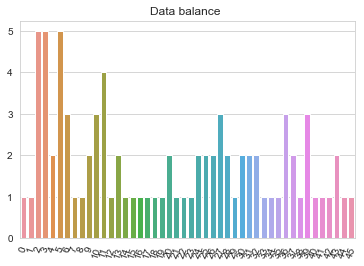

-----casos_teste------
casos: 28
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
[2 3 1 2 1 1 1 1 1 1 1 1 1 1 1 4 1 1 2 1]
28


C:\Anaconda\envs\DeepLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


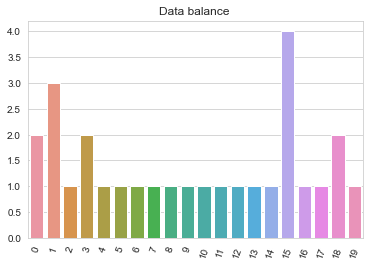

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_holdout_balance(dl):
    _, labels = next(iter(dl))                            
    sns.set_style('whitegrid')
    print("casos:",len(labels))
    x, y = np.unique(labels, return_counts=True)
    x=[str(n) for n in x]
    print(x)
    print(y)
    print(np.sum(y))
    grafico=sns.barplot(x, y)
    grafico.set_title('Data balance ')
    plt.xticks(rotation=70)
    plt.show() 

print("-----casos_treino------")   
visualize_holdout_balance(train_dl_all)
print("-----casos_teste------") 
visualize_holdout_balance(test_dl_all)

### 2.3. Definir o modelo

In [207]:
device = torch.device("cpu")

from torchinfo import summary

class MLP(Module):
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        self.hidden1 = Linear(n_inputs, 100)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        self.hidden2 = Linear(100, 150)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.hidden4 = Linear(150, 1)
        xavier_uniform_(self.hidden4.weight)
        self.act4 = ReLU()
        
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden4(X)
        X = self.act4(X)
        return X
    
model = MLP(8102)
print(summary(model, input_size=(BATCH_SIZE, 8102), verbose=0))
model.to(device)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      --                        --
├─Linear: 1-1                            [32, 100]                 810,300
├─ReLU: 1-2                              [32, 100]                 --
├─Linear: 1-3                            [32, 150]                 15,150
├─ReLU: 1-4                              [32, 150]                 --
├─Linear: 1-5                            [32, 48]                  7,248
├─Softmax: 1-6                           [32, 48]                  --
Total params: 832,698
Trainable params: 832,698
Non-trainable params: 0
Total mult-adds (M): 26.65
Input size (MB): 1.04
Forward/backward pass size (MB): 0.08
Params size (MB): 3.33
Estimated Total Size (MB): 4.44


MLP(
  (hidden1): Linear(in_features=8102, out_features=100, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=100, out_features=150, bias=True)
  (act2): ReLU()
  (hidden4): Linear(in_features=150, out_features=48, bias=True)
  (act4): Softmax(dim=1)
)

### 2.4. Treinar o modelo

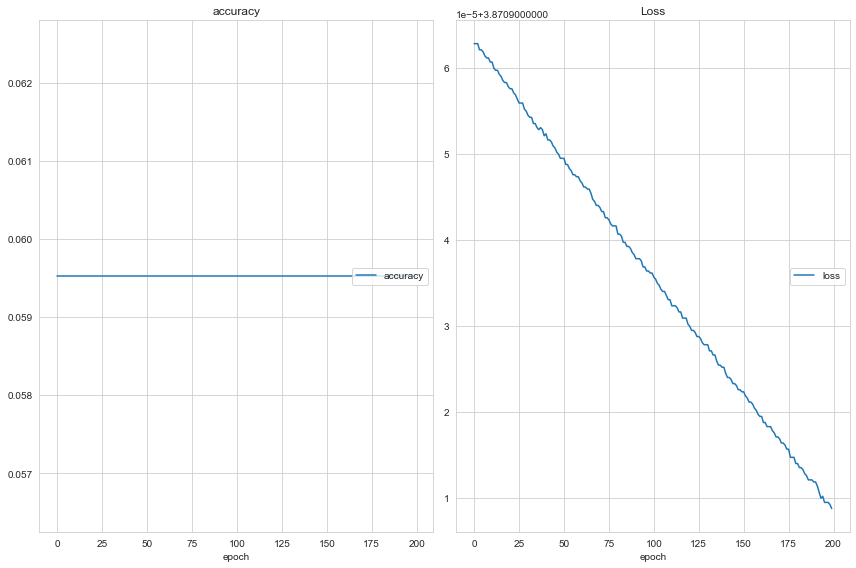

accuracy
	accuracy         	 (min:    0.060, max:    0.060, cur:    0.060)
Loss
	loss             	 (min:    3.871, max:    3.871, cur:    3.871)


In [208]:
from livelossplot import PlotLosses

EPOCHS = 200
LEARNING_RATE = 0.001

def train_model(train_dl, model):
    liveloss = PlotLosses()
    criterion = MSELoss()
    optimizer = Adam(model.parameters(), lr=LEARNING_RATE)
    for epoch in range(EPOCHS):
        logs = {}
        epoch_loss  = 0 
        epoch_acc  = 0 
        for i, (inputs, labels) in enumerate(train_dl):
            print(inputs)
            optimizer.zero_grad()
            outputs = model(inputs)
            labels = labels.long()
            print(labels)
            loss = criterion(outputs, labels)
            acc = accuracy_score(labels.numpy(), np.argmax(outputs.detach().numpy(), axis=1))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
        print(f'Epoch {epoch:03}: | Loss: {epoch_loss/len(train_dl):.5f} | Acc: {epoch_acc/len(train_dl):.3f}')      
        logs['loss'] = epoch_loss
        logs['accuracy'] = epoch_acc/len(train_dl)
        liveloss.update(logs)
        liveloss.send()

train_model(train_dl_all, model)

### 2.5. Avaliar o modelo

real:[15] previsão:[11]
real:[3] previsão:[11]
real:[0] previsão:[11]
real:[5] previsão:[11]
real:[15] previsão:[11]
real:[1] previsão:[36]
real:[14] previsão:[11]
real:[8] previsão:[36]
real:[0] previsão:[11]
real:[13] previsão:[11]
real:[1] previsão:[11]
real:[7] previsão:[11]
real:[10] previsão:[11]
real:[3] previsão:[11]
real:[19] previsão:[37]
real:[4] previsão:[11]
real:[15] previsão:[11]
real:[15] previsão:[11]
real:[11] previsão:[11]
real:[12] previsão:[11]
real:[18] previsão:[11]
real:[18] previsão:[11]
real:[16] previsão:[11]
real:[6] previsão:[11]
real:[1] previsão:[11]
real:[2] previsão:[11]
real:[9] previsão:[11]
real:[17] previsão:[11]
Accuracy: 0.036

acertou:1 falhou:27
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00 

C:\Anaconda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\DeepLearning\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\envs\DeepLearning\lib\site-packages\

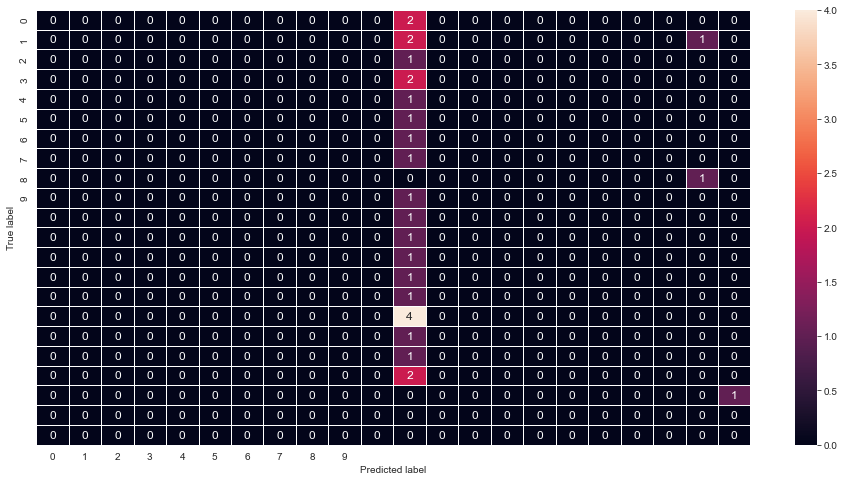

In [209]:
def evaluate_model(test_dl, model):
    predictions = list()
    actual_values = list()
    for i, (inputs, labels) in enumerate(test_dl):
        yprev = model(inputs)
        yprev = yprev.detach().numpy()
        actual = labels.numpy()
        yprev = np.argmax(yprev, axis=1)
        actual = actual.reshape((len(actual), 1))
        yprev = yprev.reshape((len(yprev), 1))
        predictions.append(yprev)
        actual_values.append(actual)
    predictions, actual_values = np.vstack(predictions), np.vstack(actual_values)
    return actual_values, predictions

def display_confusion_matrix(cm,list_classes):
    plt.figure(figsize = (16,8))
    sns.heatmap(cm,annot=True,xticklabels=list_classes,yticklabels=list_classes, annot_kws={"size": 12}, fmt='g', linewidths=.5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
actual_values, predictions = evaluate_model(test_dl, model)

acertou=0
falhou = 0
for r,p in zip(actual_values, predictions):
    print(f'real:{r} previsão:{p}')
    if r==p: acertou+=1  
    else: falhou+=1

acc = accuracy_score(actual_values, predictions)
print(f'Accuracy: {acc:0.3f}\n')
print(f'acertou:{acertou} falhou:{falhou}')

print(classification_report(actual_values, predictions))
cr = classification_report(actual_values, predictions, output_dict=True)
list_classes=list(cr.keys())[0:10]
cm = confusion_matrix(actual_values, predictions)

print (cm)
display_confusion_matrix(cm,list_classes)

# 3. Prever no dataset de teste e passar as previsões para csv

In [218]:
submissions = []

test_dl_final = DataLoader(final_test_data, batch_size=len(test), shuffle=False)

predictions = list()
actual_values = list()
inputs = next(iter(test_dl_final))
inputs = tf.cast(inputs, tf.float32)
print(inputs)

yprev = model(inputs)
yprev = yprev.detach().numpy()
yprev = np.argmax(yprev, axis=1)
   # actual = actual.reshape((len(actual), 1))
yprev = yprev.reshape((len(yprev), 1))
   # predictions.append(yprev)
   # actual_values.append(actual)
#predictions, actual_values = np.vstack(predictions), np.vstack(actual_values)

print(yprev)

#sub_csv = np.asarray(arr)
#np.savetxt('teste_submissao.csv',sub_csv, fmt="%d", delimiter=',')

NameError: name 'tf' is not defined